In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
df=pd.read_csv(r"https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",header=None)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
0     303 non-null float64
1     303 non-null float64
2     303 non-null float64
3     303 non-null float64
4     303 non-null float64
5     303 non-null float64
6     303 non-null float64
7     303 non-null float64
8     303 non-null float64
9     303 non-null float64
10    303 non-null float64
11    303 non-null object
12    303 non-null object
13    303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [65]:
column_names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
df.columns=column_names

In [66]:
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [67]:
#looks like the data has some unknown values in the ca and thal column. Let's remove them
df=df[(df['ca'] != '?') & (df['thal']!= '?')]

In [68]:
df=df.astype('float')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
age         297 non-null float64
sex         297 non-null float64
cp          297 non-null float64
trestbps    297 non-null float64
chol        297 non-null float64
fbs         297 non-null float64
restecg     297 non-null float64
thalach     297 non-null float64
exang       297 non-null float64
oldpeak     297 non-null float64
slope       297 non-null float64
ca          297 non-null float64
thal        297 non-null float64
num         297 non-null float64
dtypes: float64(14)
memory usage: 34.8 KB


In [70]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,297.0,54.542088,9.049736,29.0,48.0,56.0,61.0,77.0
sex,297.0,0.676768,0.468500,0.0,0.0,1.0,1.0,1.0
cp,297.0,3.158249,0.964859,1.0,3.0,3.0,4.0,4.0
trestbps,297.0,131.693603,17.762806,94.0,120.0,130.0,140.0,200.0
chol,297.0,247.350168,51.997583,126.0,211.0,243.0,276.0,564.0
fbs,297.0,0.144781,0.352474,0.0,0.0,0.0,0.0,1.0
restecg,297.0,0.996633,0.994914,0.0,0.0,1.0,2.0,2.0
thalach,297.0,149.599327,22.941562,71.0,133.0,153.0,166.0,202.0
exang,297.0,0.326599,0.469761,0.0,0.0,0.0,1.0,1.0
oldpeak,297.0,1.055556,1.166123,0.0,0.0,0.8,1.6,6.2


In [71]:
#let's check our correlation information to check if any variable is highly correlated or not
df.corr()['num'].sort_values(ascending=False)

num         1.000000
ca          0.521178
thal        0.513377
oldpeak     0.501461
cp          0.404248
exang       0.391613
slope       0.374689
sex         0.226797
age         0.222156
restecg     0.184136
trestbps    0.159620
chol        0.066448
fbs         0.049040
thalach    -0.420639
Name: num, dtype: float64

In [72]:
#lets explore how our target variable looks like
df['num'].value_counts()

0.0    160
1.0     54
3.0     35
2.0     35
4.0     13
Name: num, dtype: int64

In [73]:
X=df.drop('num',axis=1)
y=df['num'].copy()

In [74]:
#to make our problem simpler let's train a binary classifier that predicts if the given patient has heart disease or not
y_non_zero=y>0
y[y_non_zero]=1
y.value_counts()

0.0    160
1.0    137
Name: num, dtype: int64

In [75]:
#let's split the data into training and testing set
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [77]:
#by the knowledege of the dataset we cn conclude that there are columns which are categorical and need to be one hot encoded

In [78]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 94 to 231
Data columns (total 13 columns):
age         222 non-null float64
sex         222 non-null float64
cp          222 non-null float64
trestbps    222 non-null float64
chol        222 non-null float64
fbs         222 non-null float64
restecg     222 non-null float64
thalach     222 non-null float64
exang       222 non-null float64
oldpeak     222 non-null float64
slope       222 non-null float64
ca          222 non-null float64
thal        222 non-null float64
dtypes: float64(13)
memory usage: 24.3 KB


In [79]:
cat_columns=['sex','cp','fbs','restecg','exang','slope','ca','thal']
cat_columns_index=[]
for col in cat_columns:
    cat_columns_index.append(df.columns.get_loc(col))

In [80]:
cat_columns_index

[1, 2, 5, 6, 8, 10, 11, 12]

In [81]:
#let's automate the task by making a custom transformer that takes all the data and apply transformation to features we want
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.preprocessing import OneHotEncoder
class transformer(BaseEstimator,TransformerMixin):
    def __init__(self,feature_index):
        self.feature_index=feature_index
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X=X.copy()
        encoder=OneHotEncoder(sparse=False,categories='auto')
        encoded=encoder.fit_transform(X[:,self.feature_index])
        #X=X[:,(0,3,4,7,9)]
        return np.c_[X,encoded] 
    

In [82]:
#let's wrap our transformer into a wonderful pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

full_pipeline=Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                              ('transformer',transformer(cat_columns_index)),])

In [83]:
X_train_transformed=full_pipeline.fit_transform(X_train)

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
tree_clf= DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_transformed,y_train)

DecisionTreeClassifier(random_state=42)

In [86]:
from sklearn.tree import plot_tree

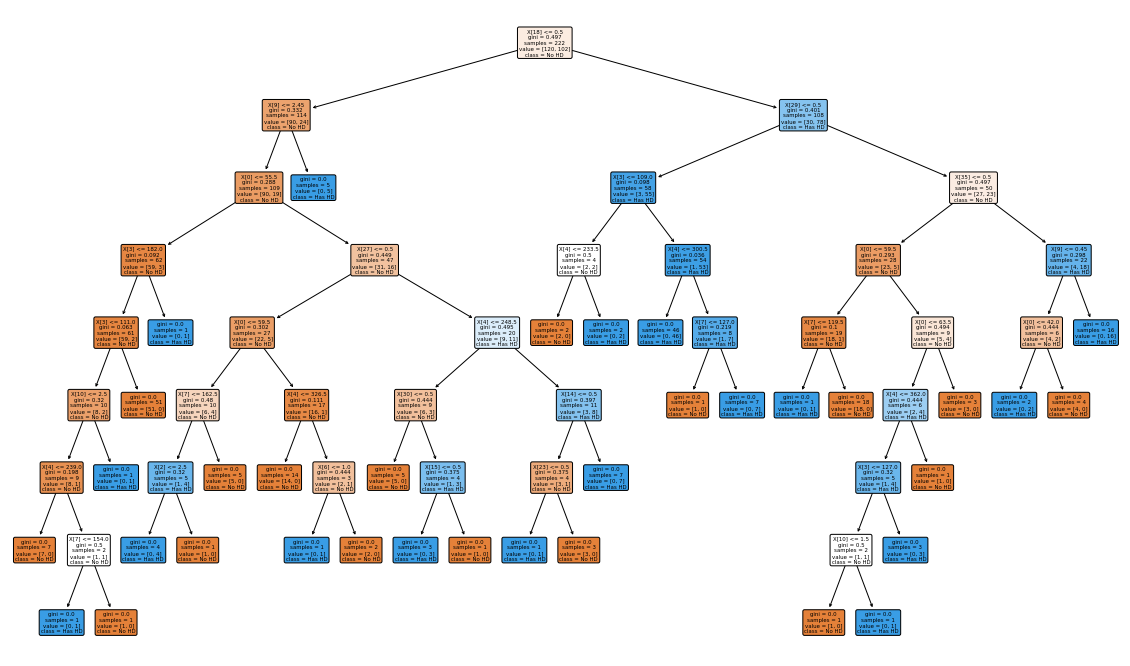

In [87]:
plt.figure(figsize=(20,12))
plot_tree(tree_clf,filled=True,rounded=True,class_names=['No HD','Has HD']);

In [88]:
#this is a huge tree and maybe overfitting the training set too let's confirm this by applying it on testing set

In [89]:
X_test_transformed=full_pipeline.transform(X_test)
y_preds=tree_clf.predict(X_test_transfromed)

In [90]:
from sklearn.metrics import confusion_matrix

In [91]:
import seaborn as sns

In [92]:
print(confusion_matrix(y_test,y_preds))

[[33  7]
 [13 22]]


In [93]:
from sklearn.metrics import plot_confusion_matrix

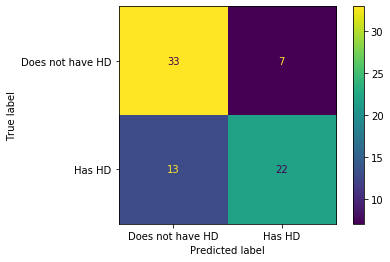

In [94]:
plot_confusion_matrix(tree_clf,X_test_transfromed,y_test,display_labels=['Does not have HD','Has HD'])

In [95]:
#this tells that out of 40 people that have no HD 33 (82.5%) has been correctly classified
#also out of 35 people that have HD 22 (62.8%) have been correctly identified
#in medical our aim is to minimize the number of false negative so that every patient gets good care 
#we can check if we can increase this score by pruning

In [96]:
path=tree_clf.cost_complexity_pruning_path(X_train_transformed, y_train)

In [97]:
ccp_alphas=path.ccp_alphas
ccp_alphas=ccp_alphas[:-1]

In [98]:
clf_dts=[]
for ccp_alpha in ccp_alphas:
    tree_clf=DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha)
    tree_clf.fit(X_train_transformed,y_train)
    clf_dts.append(tree_clf)

In [99]:
train_scores=[clf_dt.score(X_train_transformed,y_train) for clf_dt in clf_dts]
test_scores=[clf_dt.score(X_test_transformed,y_test) for clf_dt in clf_dts]

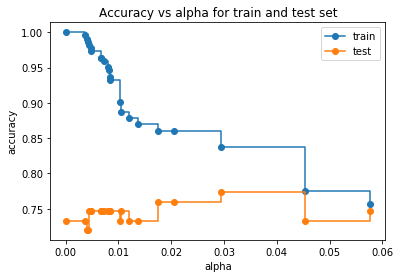

In [100]:
fig,ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for train and test set')
ax.plot(ccp_alphas,train_scores,marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alphas,test_scores,marker='o',label='test',drawstyle='steps-post')
ax.legend()

In [101]:
#seems like alpha at 0.025 gives best fit for both train and test set

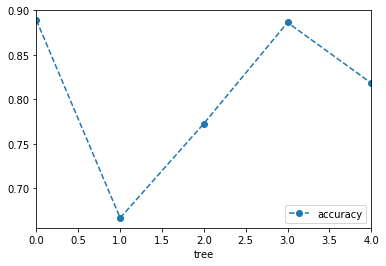

In [102]:
#there is a good chance that the improved accuracy is because of the split we made and if the split had been different
#the accuracy would not be this good
#let's try on cross validation
tree_clf=DecisionTreeClassifier(random_state=42,ccp_alpha=0.025)

from sklearn.model_selection import cross_val_score

scores= cross_val_score(tree_clf,X_train_transformed,y_train,cv=5)
df=pd.DataFrame(data={'tree':range(5),'accuracy':scores})

df.plot(x='tree',y='accuracy',marker='o',ls='--')

In [103]:
#this tells that the value of alpha is extremely senesitive to the selection of the dataset
#instead lets try finding the optimal value of alpha using all training set

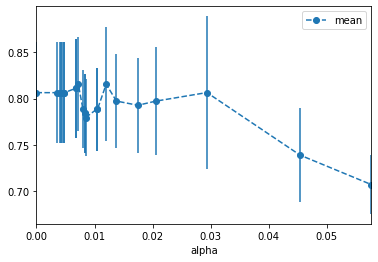

In [104]:
alpha_loop_values= []

for ccp_alpha in ccp_alphas:
    tree_clf=DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha)
    scores=cross_val_score(tree_clf,X_train_transformed,y_train,cv=5)
    alpha_loop_values.append([ccp_alpha,np.mean(scores),np.std(scores)])
    
alpha_results=pd.DataFrame(alpha_loop_values,columns=['alpha','mean','std'])

alpha_results.plot(x='alpha',y='mean',yerr='std',marker='o',ls='--')

In [108]:
#seems like by cross validation the optimal value of alpha is somewhere near 0.03
ideal_ccp=alpha_results[(alpha_results['alpha']>0.025) & (alpha_results['alpha']<0.03)]['alpha']

In [109]:
ideal_ccp_alpha=float(ideal_ccp)

In [111]:
#lets train a pruned tree
tree_clf_pruned=DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_ccp_alpha)
tree_clf_pruned.fit(X_train_transformed,y_train)

DecisionTreeClassifier(ccp_alpha=0.029363018257272278, random_state=42)

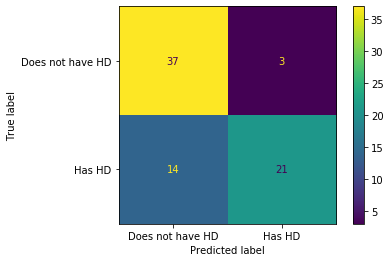

In [112]:
plot_confusion_matrix(tree_clf_pruned,X_test_transformed,y_test,display_labels=['Does not have HD','Has HD'])

In [113]:
#the results has been improved

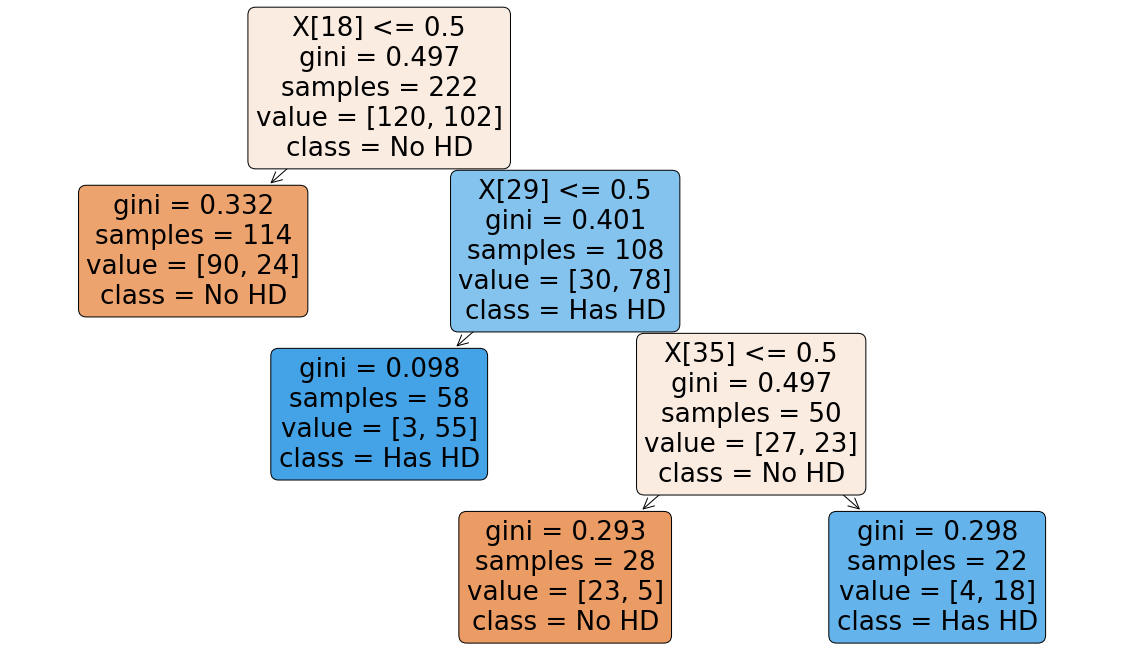

In [114]:
plt.figure(figsize=(20,12))
plot_tree(tree_clf_pruned,filled=True,rounded=True,class_names=['No HD','Has HD']);

In [115]:
#the tree has been significantly reduced